### Imports and Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv', index_col='Id')
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,60,RL,60.0,6931,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,165400
1256,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,127500
1257,20,RL,91.0,14303,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,301500


In [3]:
test_df = pd.read_csv('test.csv', index_col='Id')
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1260,20,RL,65.0,9750,Pave,NaN,Reg,Lvl,AllPub,FR2,...,80,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1261,60,RL,NaN,24682,Pave,NaN,IR3,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1262,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1263,50,RL,NaN,11250,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
1264,70,RL,60.0,13515,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal


### EDA & Extracting Insights

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1 to 1259
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1259 non-null   int64  
 1   MSZoning       1259 non-null   object 
 2   LotFrontage    1041 non-null   float64
 3   LotArea        1259 non-null   int64  
 4   Street         1259 non-null   object 
 5   Alley          76 non-null     object 
 6   LotShape       1259 non-null   object 
 7   LandContour    1259 non-null   object 
 8   Utilities      1259 non-null   object 
 9   LotConfig      1259 non-null   object 
 10  LandSlope      1259 non-null   object 
 11  Neighborhood   1259 non-null   object 
 12  Condition1     1259 non-null   object 
 13  Condition2     1259 non-null   object 
 14  BldgType       1259 non-null   object 
 15  HouseStyle     1259 non-null   object 
 16  OverallQual    1259 non-null   int64  
 17  OverallCond    1259 non-null   int64  
 18  YearBuil

In [5]:
# NANs check
train_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      218
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [6]:
# Only Columns with NANs check
train_df.loc[:,train_df.isnull().any()].isnull().sum()

LotFrontage      218
Alley           1183
MasVnrType         7
MasVnrArea         7
BsmtQual          35
BsmtCond          35
BsmtExposure      36
BsmtFinType1      35
BsmtFinType2      36
FireplaceQu      599
GarageType        71
GarageYrBlt       71
GarageFinish      71
GarageQual        71
GarageCond        71
PoolQC          1255
Fence           1019
MiscFeature     1208
dtype: int64

#### Checking Highly filled NaNs columns

In [7]:
train_df[train_df['PoolQC'].notnull()][['PoolQC', 'SalePrice']]

,PoolQC,SalePrice
Id,,
198,Ex,235000
811,Fa,181000
1171,Gd,171000
1183,Ex,745000


In [8]:
train_df[train_df['MiscFeature'].notnull()].groupby(['MiscFeature'])['SalePrice'].max()

MiscFeature
Gar2    190000
Othr    133000
Shed    277000
Name: SalePrice, dtype: int64

In [9]:
train_df[train_df['MiscFeature'].notnull()].groupby(['MiscFeature'])['SalePrice'].min()

MiscFeature
Gar2    151500
Othr     55000
Shed     55993
Name: SalePrice, dtype: int64

In [10]:
train_df[train_df['Fence'].notnull()].groupby(['Fence'])['SalePrice'].max()

Fence
GdPrv    475000
GdWo     289000
MnPrv    745000
MnWw     187000
Name: SalePrice, dtype: int64

In [11]:
train_df[train_df['Fence'].notnull()].groupby(['Fence'])['SalePrice'].min()

Fence
GdPrv    108000
GdWo      34900
MnPrv     40000
MnWw     110000
Name: SalePrice, dtype: int64

In [12]:
train_df[train_df['Alley'].notnull()].groupby(['Alley'])['SalePrice'].max()

Alley
Grvl    178000
Pave    265979
Name: SalePrice, dtype: int64

In [13]:
train_df[train_df['Alley'].notnull()].groupby(['Alley'])['SalePrice'].min()

Alley
Grvl    67000
Pave    40000
Name: SalePrice, dtype: int64

- Columns `Alley`, `PoolQC`, `Fence` and `MiscFeature` almost records are NaNs, we will drop it.
- The rest will be imputed or dropna recording to nomber of NaNs and dtype.

In [14]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1259.000000,1041.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1252.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,56.914218,70.110471,10524.300238,6.103257,5.570294,1971.478157,1984.816521,103.133387,443.334392,45.725973,...,94.604448,46.150913,21.625099,3.482129,14.668785,1.819698,45.944400,6.315330,2007.799841,181144.812550
std,42.353617,23.522213,10391.598333,1.381394,1.119465,29.933659,20.617506,182.185126,439.025793,159.593598,...,123.939261,65.449317,60.920712,29.289552,54.093490,32.364185,525.688744,2.684202,1.324095,80588.024473
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7590.000000,5.000000,5.000000,1954.000000,1966.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,70.000000,9452.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,385.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,70.000000,80.000000,11611.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213750.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
train_df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.397117,-0.124523,0.038126,-0.058921,0.030828,0.044212,0.026365,-0.068183,-0.048566,...,0.004691,-0.003911,-0.023596,-0.036815,-0.032764,0.000203,-0.009542,0.001958,-0.010881,-0.076628
LotFrontage,-0.397117,1.000000,0.390300,0.245102,-0.058688,0.112571,0.082321,0.170871,0.158104,0.062602,...,0.076873,0.142270,0.028764,0.070290,0.052953,0.128189,0.004415,0.019926,0.006987,0.378138
LotArea,-0.124523,0.390300,1.000000,0.097107,-0.004448,0.006597,0.011644,0.089085,0.190906,0.120436,...,0.173781,0.070516,-0.016449,0.013383,0.051514,0.023248,0.038711,0.006419,-0.020139,0.267146
OverallQual,0.038126,0.245102,0.097107,1.000000,-0.083344,0.569794,0.556333,0.410741,0.223098,-0.053877,...,0.233774,0.304890,-0.094715,0.018474,0.075551,0.053473,-0.038977,0.078894,-0.021286,0.790786
OverallCond,-0.058921,-0.058688,-0.004448,-0.083344,1.000000,-0.381242,0.081891,-0.126939,-0.042889,0.046174,...,-0.004177,-0.023493,0.072373,0.024191,0.045916,-0.013045,0.063002,-0.010689,0.030414,-0.083382
YearBuilt,0.030828,0.112571,0.006597,0.569794,-0.381242,1.000000,0.594038,0.316002,0.235523,-0.042714,...,0.233036,0.187761,-0.378061,0.026625,-0.034936,-0.007349,-0.032466,0.019304,0.014410,0.524407
YearRemodAdd,0.044212,0.082321,0.011644,0.556333,0.081891,0.594038,1.000000,0.184918,0.121526,-0.061302,...,0.215284,0.243421,-0.196151,0.036746,-0.023735,0.016141,-0.010992,0.031268,0.053221,0.512674
MasVnrArea,0.026365,0.170871,0.089085,0.410741,-0.126939,0.316002,0.184918,1.000000,0.253137,-0.063762,...,0.165032,0.116177,-0.103496,0.011902,0.086028,-0.023270,-0.030357,-0.003837,0.001436,0.483754
BsmtFinSF1,-0.068183,0.158104,0.190906,0.223098,-0.042889,0.235523,0.121526,0.253137,1.000000,-0.046444,...,0.208447,0.082063,-0.097119,0.017842,0.072006,0.078790,0.002993,-0.011076,0.007577,0.409673
BsmtFinSF2,-0.048566,0.062602,0.120436,-0.053877,0.046174,-0.042714,-0.061302,-0.063762,-0.046444,1.000000,...,0.065673,0.005176,0.031000,-0.033233,0.084689,0.035974,-0.000479,-0.013717,0.015374,0.000474


In [16]:
train_df.describe().loc['min']

MSSubClass          20.0
LotFrontage         21.0
LotArea           1300.0
OverallQual          1.0
OverallCond          1.0
YearBuilt         1875.0
YearRemodAdd      1950.0
MasVnrArea           0.0
BsmtFinSF1           0.0
BsmtFinSF2           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
1stFlrSF           334.0
2ndFlrSF             0.0
LowQualFinSF         0.0
GrLivArea          334.0
BsmtFullBath         0.0
BsmtHalfBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenAbvGr         0.0
TotRmsAbvGrd         2.0
Fireplaces           0.0
GarageYrBlt       1900.0
GarageCars           0.0
GarageArea           0.0
WoodDeckSF           0.0
OpenPorchSF          0.0
EnclosedPorch        0.0
3SsnPorch            0.0
ScreenPorch          0.0
PoolArea             0.0
MiscVal              0.0
MoSold               1.0
YrSold            2006.0
SalePrice        34900.0
Name: min, dtype: float64

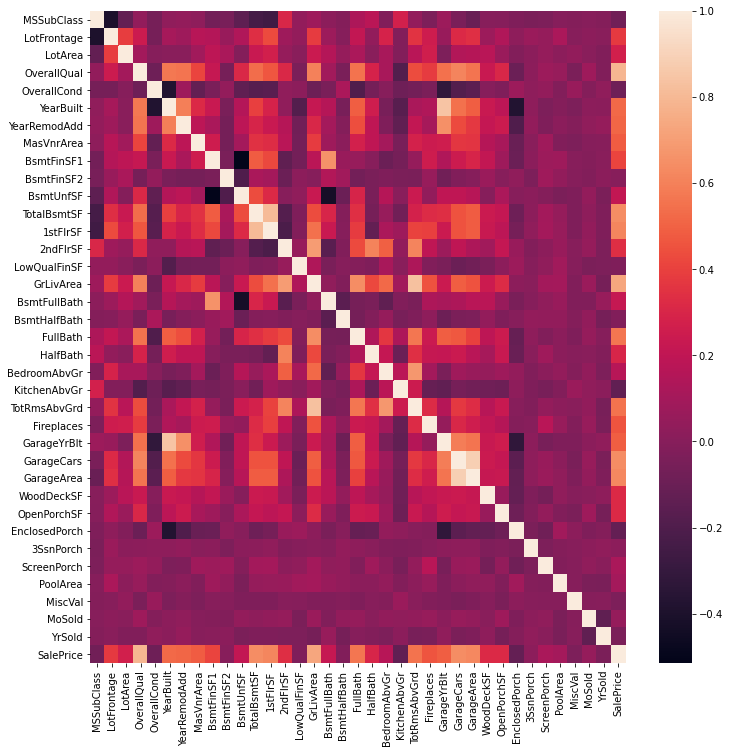

In [17]:
plt.figure(figsize=(12,12));
sns.heatmap(train_df.corr());

- No strong correlation above 95% between columns, so we must deal with them all without drop any of them.

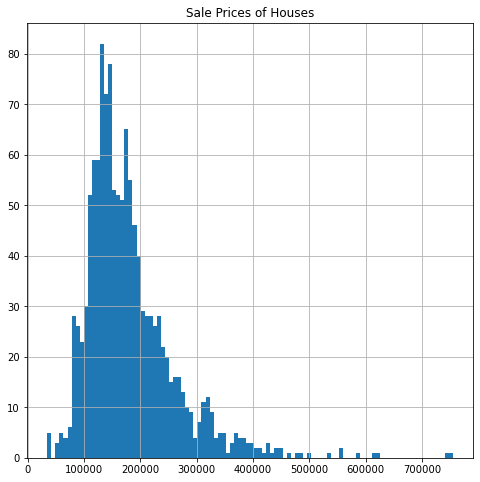

In [18]:
plt.figure(figsize=(8,8));
train_df['SalePrice'].hist(bins=100);
plt.title('Sale Prices of Houses');

In [19]:
train_df['SalePrice'].describe()

count      1259.000000
mean     181144.812550
std       80588.024473
min       34900.000000
25%      129900.000000
50%      163500.000000
75%      213750.000000
max      755000.000000
Name: SalePrice, dtype: float64

- `Most` Sale Prices in the range from 100K to 200K
- `Min` Sale Price abount 35K and `Max` Sale Price about 750K
- `Mean` Sale Price about 180K

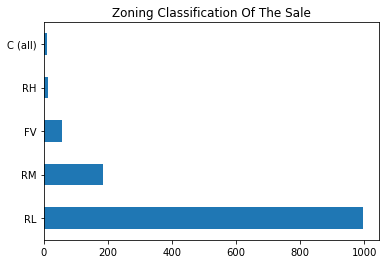

In [20]:
train_df['MSZoning'].value_counts().plot(kind='barh')
plt.title('Zoning Classification Of The Sale');

- Most `Zoning Classification` of sale is RL [Residential Low Density
]

In [21]:
train_df['Street'].value_counts()

Pave    1253
Grvl       6
Name: Street, dtype: int64

In [22]:
train_df[train_df['Street'] == 'Grvl']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000
336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,118500
813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1185,20,RL,50.0,35133,Grvl,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,186700


- Almost all the houses are `Paved` access from road
- This feature won't be so effective if houses price prediction, we will `drop it`.

In [23]:
train_df['Utilities'].value_counts()

AllPub    1258
NoSeWa       1
Name: Utilities, dtype: int64

In [24]:
train_df[train_df['Utilities'] == 'NoSeWa']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
945,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


- `All houses` except just 1 of 1259 houses were sold with `all public utilities`
- This feature won't be so effective if houses price prediction, we will `drop it`.

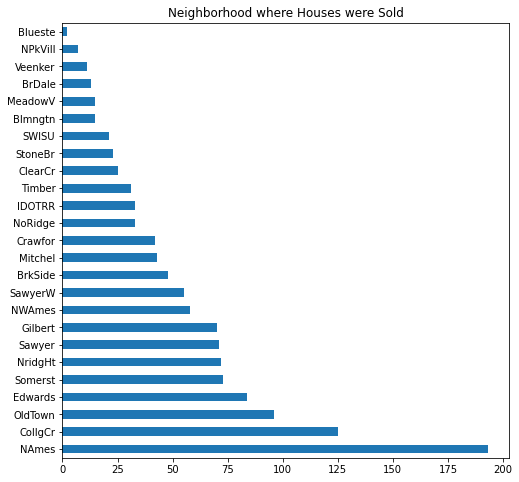

In [25]:
plt.figure(figsize=(8,8));
train_df['Neighborhood'].value_counts().plot(kind='barh');
plt.title('Neighborhood where Houses were Sold');

- Most of the homes were sold in North Ames Neighborhood.
- This feature will play a vital role in price prediction.

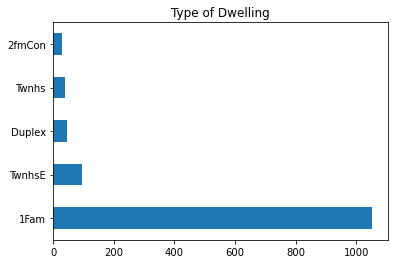

In [26]:
train_df['BldgType'].value_counts().plot(kind='barh');
plt.title('Type of Dwelling');

- Most houses were sold for `Single-family Detached`.

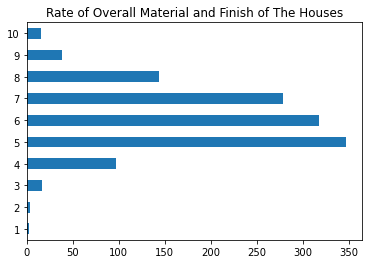

In [27]:
train_df['OverallQual'].value_counts(sort=False).plot(kind='barh');
plt.title('Rate of Overall Material and Finish of The Houses');

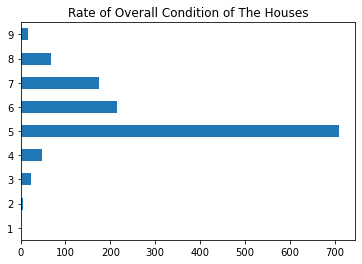

In [28]:
train_df['OverallCond'].value_counts(sort=False).plot(kind='barh');
plt.title('Rate of Overall Condition of The Houses');

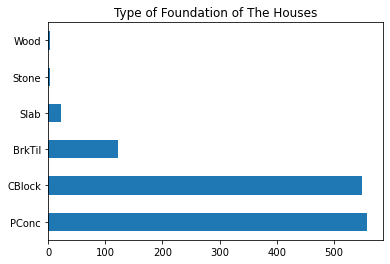

In [29]:
train_df['Foundation'].value_counts().plot(kind='barh');
plt.title('Type of Foundation of The Houses');

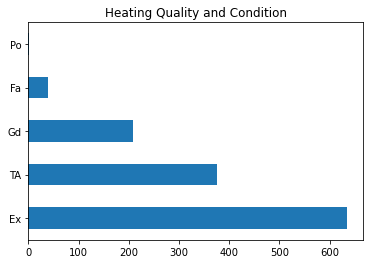

In [30]:
train_df['HeatingQC'].value_counts().plot(kind='barh');
plt.title('Heating Quality and Condition');

- Most of the homes were sold with rate of Overall Material and Finish from `5 to 7`, Overall Condition of `5 and above 5`.
- The most sold houses were `Poured Contrete` and `Cinder Block` foundations.
- Almost `all houses` had `Heating Quality and Condition` and most of them were `Exceelent`
- This feature will be important in price prediction.

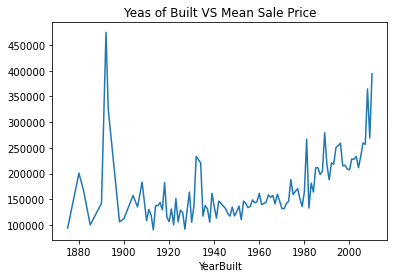

In [31]:
train_df.groupby(['YearBuilt'])['SalePrice'].mean().plot();
plt.title('Yeas of Built VS Mean Sale Price');

In [32]:
train_df.groupby(['YearBuilt'])['SalePrice'].mean().head(10)

YearBuilt
1875     94000.00
1880    200619.75
1882    168000.00
1885    100000.00
1890    142200.00
1892    475000.00
1893    325000.00
1898    106000.00
1900    112492.60
1904    157500.00
Name: SalePrice, dtype: float64

- `Modern houses` are sold with `High Prices` compared with old ones
- Only houses built in `1892 and 1893` were sold with `High Prices` even more than modrn ones, these houses must worth that.

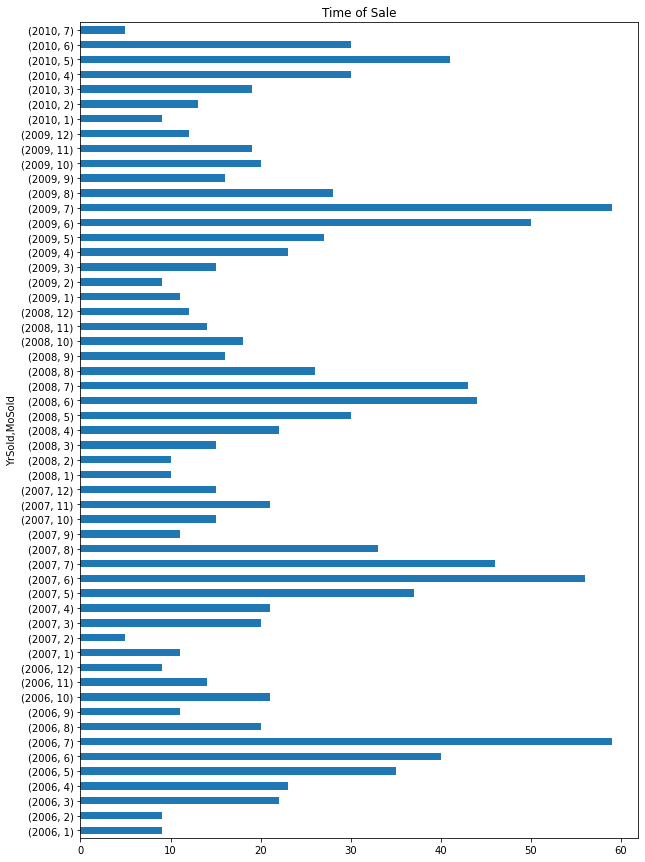

In [33]:
plt.figure(figsize=(10,15));
train_df.groupby(['YrSold'])['MoSold'].value_counts(sort=False).plot(kind='barh');
plt.title('Time of Sale');

- Houses sales increase in months `5 to 7` (End of Spring and Beginning of Summer)

### Model 1  Pre-Processing

### Model 1  Pre-Processing

In [34]:
# Drop Almost NaNs and One Catagory columns
train_df = train_df.drop(['Alley','PoolQC', 'Fence', 'MiscFeature', 'Utilities', 'Street'], axis=1)
test_df = test_df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Utilities', 'Street'], axis=1)

In [35]:
print(train_df.shape)
print(test_df.shape)

(1259, 74)
(201, 73)


In [36]:
# OneHot Enconding Catagorical columns
Encoded_train = pd.get_dummies(train_df)
Encoded_test = pd.get_dummies(test_df)

In [37]:
print(Encoded_train.shape)
print(Encoded_test.shape)

(1259, 267)
(201, 229)


In [38]:
# Align two dataframes
train1, test1 = Encoded_train.align(Encoded_test, join='right', axis=1)

In [39]:
print(train1.shape)
print(test1.shape)

(1259, 229)
(201, 229)


In [40]:
train1.loc[:, train1.isnull().all()].isnull().sum()

RoofMatl_ClyTile      1259
RoofMatl_Roll         1259
Exterior1st_CBlock    1259
Exterior2nd_CBlock    1259
Heating_Floor         1259
dtype: int64

In [41]:
# Drop all NaNs columns
train1 = train1.drop(['RoofMatl_ClyTile', 'RoofMatl_Roll', 'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'Heating_Floor'], axis=1)
test1 = test1.drop(['RoofMatl_ClyTile', 'RoofMatl_Roll', 'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'Heating_Floor'], axis=1)

In [42]:
print(train1.shape)
print(test1.shape)

(1259, 224)
(201, 224)


In [43]:
print(train1.columns == test1.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [44]:
# x & y
x = train1
y = np.log(train_df['SalePrice'])

In [45]:
print(x.shape)
print(y.shape)

(1259, 224)
(1259,)


- we will stop preprocessing tell here and start spliting so that we prevent `Data Leakage` between train and valid data sets.

### Spliting Train and Validation Data Sets

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [48]:
# Fill NaNs records with mean values
x_train.fillna(x_train.mean(), axis=0, inplace=True)
x_valid.fillna(x_valid.mean(), axis=0, inplace=True)
# test1.fillna(test1.mean(), axis=0, inplace=True)

C:\Users\Wssam\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### Model 1

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [50]:
model1 = LinearRegression().fit(x_train, y_train)
x_valid_predicted = model1.predict(x_valid)
print('R2 Score = ', r2_score(y_valid, x_valid_predicted))
print('RMSE = ', np.sqrt(mean_squared_error(np.exp(y_valid), np.exp(x_valid_predicted))))

R2 Score =  0.897422644994231
RMSE =  22745.62434912109


### Re-Model 1 Using Different Catagorize Encoding Method

In [51]:
print(train_df.shape)
print(test_df.shape)

(1259, 74)
(201, 73)


In [52]:
catagories = list(train_df.select_dtypes(include='object').columns)
catagories

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [53]:
# Label Enconding Catagorical columns
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

for col in catagories:
    train_df_copy[col] = pd.factorize(train_df_copy[col])[0].reshape(-1, 1)
    test_df_copy[col] = pd.factorize(test_df_copy[col])[0].reshape(-1, 1)

In [54]:
print(train_df_copy.shape)
print(test_df_copy.shape)

(1259, 74)
(201, 73)


In [55]:
train_df_copy.loc[:, train_df_copy.isnull().any()].isnull().sum()

LotFrontage    218
MasVnrArea       7
GarageYrBlt     71
dtype: int64

In [56]:
test_df_copy.loc[:, test_df_copy.isnull().any()].isnull().sum()

LotFrontage    41
MasVnrArea      1
GarageYrBlt    10
dtype: int64

In [57]:
# Filling NaNs Columns
train_df_copy.fillna(train_df_copy.median(), axis=0, inplace=True)
test_df_copy.fillna(test_df_copy.median(), axis=0, inplace=True)

In [58]:
# x & y
x = train_df_copy.drop('SalePrice', axis=1)
y = np.log(train_df_copy['SalePrice'])

In [59]:
print(x.shape)
print(y.shape)

(1259, 73)
(1259,)


In [60]:
x_train1, x_valid1, y_train1, y_valid1 = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [61]:
model1 = LinearRegression().fit(x_train1, y_train1)
x_valid1_predicted = model1.predict(x_valid1)
print('R2 Score = ', r2_score(y_valid1, x_valid1_predicted))
print('RMSE = ', np.sqrt(mean_squared_error(np.exp(y_valid1), np.exp(x_valid1_predicted))))

R2 Score =  0.8865880052757406
RMSE =  24292.996815558956


- Both scores and RMSE are somwhow close, but using `OneHotEncoding is better`.

### Model 2  Pre-Processing
- Modeling using the valuable features out of EDA
    - LotArea: Lot size in square feet
    - Neighborhood: Physical locations within Ames city limits
    - OverallQual: Rates the overall material and finish of the house
    - OverallCond: Rates the overall condition of the house
    - YearBuilt: Original construction date
    - Foundation: Type of foundation
    - HeatingQC: Heating quality and condition
    - 1stFlrSF: First Floor square feet
    - 2ndFlrSF: Second floor square feet
    - Fireplaces: Number of fireplaces
    - GarageArea: Size of garage in square feet
    - TotRmsAbvGrd: Total rooms above grade
    - MoSold: Month Sold (MM)
    - YrSold: Year Sold (YYYY)
    - YearBuilt: Original construction date

In [62]:
valuable_features = ['LotArea', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'Foundation', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'TotRmsAbvGrd', 'MoSold', 'YrSold', 'YearBuilt']
valuable_train = train_df[valuable_features]
valuable_test = test_df[valuable_features]

In [63]:
valuable_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1 to 1259
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1259 non-null   int64 
 1   Neighborhood  1259 non-null   object
 2   OverallQual   1259 non-null   int64 
 3   OverallCond   1259 non-null   int64 
 4   YearBuilt     1259 non-null   int64 
 5   Foundation    1259 non-null   object
 6   1stFlrSF      1259 non-null   int64 
 7   2ndFlrSF      1259 non-null   int64 
 8   GarageArea    1259 non-null   int64 
 9   TotRmsAbvGrd  1259 non-null   int64 
 10  MoSold        1259 non-null   int64 
 11  YrSold        1259 non-null   int64 
 12  YearBuilt     1259 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 137.7+ KB


In [64]:
valuable_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 1260 to 1460
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       201 non-null    int64 
 1   Neighborhood  201 non-null    object
 2   OverallQual   201 non-null    int64 
 3   OverallCond   201 non-null    int64 
 4   YearBuilt     201 non-null    int64 
 5   Foundation    201 non-null    object
 6   1stFlrSF      201 non-null    int64 
 7   2ndFlrSF      201 non-null    int64 
 8   GarageArea    201 non-null    int64 
 9   TotRmsAbvGrd  201 non-null    int64 
 10  MoSold        201 non-null    int64 
 11  YrSold        201 non-null    int64 
 12  YearBuilt     201 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 22.0+ KB


In [65]:
# OneHot Enconding Catagorical columns
Encoded_train2 = pd.get_dummies(valuable_train)
Encoded_test2 = pd.get_dummies(valuable_test)

print(Encoded_train2.shape)
print(Encoded_test2.shape)

(1259, 42)
(201, 39)


In [66]:
# Align two dataframes
train2, test2 = Encoded_train2.align(Encoded_test2, join='right', axis=1)

print(train2.shape)
print(test2.shape)

(1259, 41)
(201, 41)


In [67]:
print(train2.isnull().sum().sum())
print(test2.isnull().sum().sum())

0
0


In [68]:
x2 = train2
y = np.log(train_df['SalePrice'])

### Spliting Train and Validation Data Sets

In [69]:
x_train2, x_valid2, y_train2, y_valid2 = train_test_split(x2, y, test_size = 0.2, random_state = 42)

### Model 2

In [70]:
model2 = LinearRegression().fit(x_train2, y_train2)
x_valid2_predicted = model2.predict(x_valid2)
print('R2 Score = ', r2_score(y_valid2, x_valid2_predicted))
print('RMSE = ', np.sqrt(mean_squared_error(np.exp(y_valid2), np.exp(x_valid2_predicted))))

R2 Score =  0.8998240934342123
RMSE =  22557.790298387787


### Model 3  Pre-Processing
- Modeling using only Areas features, Place and Number of Rooms 
    - LotArea: Lot size in square feet
    - Neighborhood: Physical locations within Ames city limits
    - BsmtFinSF1: Type 1 finished square feet
    - BsmtFinSF2: Type 2 finished square feet
    - TotalBsmtSF: Total square feet of basement area
    - GrLivArea: Above grade (ground) living area square feet
    - 1stFlrSF: First Floor square feet
    - 2ndFlrSF: Second floor square feet
    - FullBath: Full bathrooms above grade
    - TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [71]:
new_valuable_features = ['LotArea', 'Neighborhood', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GrLivArea']
new_valuable_train = train_df[new_valuable_features]
new_valuable_test = test_df[new_valuable_features]

In [72]:
new_valuable_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1 to 1259
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1259 non-null   int64 
 1   Neighborhood  1259 non-null   object
 2   BsmtFinSF1    1259 non-null   int64 
 3   BsmtFinSF2    1259 non-null   int64 
 4   TotalBsmtSF   1259 non-null   int64 
 5   1stFlrSF      1259 non-null   int64 
 6   2ndFlrSF      1259 non-null   int64 
 7   FullBath      1259 non-null   int64 
 8   TotRmsAbvGrd  1259 non-null   int64 
 9   GrLivArea     1259 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 108.2+ KB


In [73]:
new_valuable_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 1260 to 1460
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       201 non-null    int64 
 1   Neighborhood  201 non-null    object
 2   BsmtFinSF1    201 non-null    int64 
 3   BsmtFinSF2    201 non-null    int64 
 4   TotalBsmtSF   201 non-null    int64 
 5   1stFlrSF      201 non-null    int64 
 6   2ndFlrSF      201 non-null    int64 
 7   FullBath      201 non-null    int64 
 8   TotRmsAbvGrd  201 non-null    int64 
 9   GrLivArea     201 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 17.3+ KB


In [74]:
# OneHot Enconding Catagorical columns
Encoded_train3 = pd.get_dummies(new_valuable_train)
Encoded_test3 = pd.get_dummies(new_valuable_test)

print(Encoded_train3.shape)
print(Encoded_test3.shape)

(1259, 34)
(201, 32)


In [75]:
# Align two dataframes
train3, test3 = Encoded_train3.align(Encoded_test3, join='right', axis=1)

print(train3.shape)
print(test3.shape)

(1259, 32)
(201, 32)


In [76]:
print(train3.isnull().sum().sum())
print(test3.isnull().sum().sum())

0
0


In [77]:
x3 = train3
y = np.log(train_df['SalePrice'])

### Spliting Train and Validation Data Sets

In [78]:
x_train3, x_valid3, y_train3, y_valid3 = train_test_split(x3, y, test_size = 0.2, random_state = 42)

### Model 3

In [79]:
model3 = LinearRegression().fit(x_train3, y_train3)
x_valid3_predicted = model3.predict(x_valid3)
print('R2 Score = ', r2_score(y_valid3, x_valid3_predicted))
print('RMSE = ', np.sqrt(mean_squared_error(np.exp(y_valid3), np.exp(x_valid3_predicted))))

R2 Score =  0.8444754618496886
RMSE =  28510.697948459954


- Then the `best Model` is the `second one`

### Test Prediction

In [83]:
test_prediction = model2.predict(test2)
test_prediction = np.exp(test_prediction)

In [84]:
final_Output = pd.DataFrame({'Id': test2.index,'SalePrice': test_prediction})

In [85]:
final_Output.to_csv('submission.csv', index=False)